In [ ]:
!pip install seaborn

import pandas as pd
import networkx as nx
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

df_br = pd.read_csv('./O2C_Data/ACTIVITY_TABLE_BR.csv', sep = ',')
df_de = pd.read_csv('./O2C_Data/ACTIVITY_TABLE_DE.csv', sep = ',')
df_pt = pd.read_csv('./O2C_Data/ACTIVITY_TABLE_PT.csv', sep = ',')
df_th = pd.read_csv('./O2C_Data/ACTIVITY_TABLE_TH.csv', sep = ',')

In [60]:
df_br.head(3)

,ACTIVITY,TIMESTAMP,SALES_DOC,SALES_DOC_ITEM,COUNTRY
0,Create Sales Order,2021-10-04 16:22:36,50043243,10,BR
1,Create Sales Order Item,2021-10-04 16:22:36,50043243,10,BR
2,Material Availability Date passed,2021-10-04 00:00:00,50043243,10,BR


In [61]:
df_de.head(3)

,ACTIVITY,TIMESTAMP,SALES_DOC,SALES_DOC_ITEM,COUNTRY
0,Set Initial Delivery Block,2022-02-01 18:27:42,1129257591,5450,DE
1,Material Availability Date passed,2022-03-08 00:00:00,1129257591,5450,DE
2,Create Sales Order Item,2022-02-01 18:27:42,1129257591,5450,DE


In [62]:
df_pt.head(3)

,ACTIVITY,TIMESTAMP,SALES_DOC,SALES_DOC_ITEM,COUNTRY
0,Record Goods Issue,2021-04-08 15:17:29,1127382723,10,PT
1,Create Delivery,2021-04-06 11:44:53,1127382723,10,PT
2,Create Intercompany invoice,2021-04-09 14:10:22,1127382723,10,PT


In [63]:
df_th.head(3)

,ACTIVITY,TIMESTAMP,SALES_DOC,SALES_DOC_ITEM,COUNTRY
0,Record Goods Issue,2021-07-15 17:04:53,1128218301,10,TH
1,Create Delivery,2021-07-09 07:08:23,1128218301,10,TH
2,Create Intercompany invoice,2021-07-09 13:53:58,1128218301,10,TH


In [64]:
df = pd.concat([df_br, df_de, df_pt, df_th])

df.head(3)

,ACTIVITY,TIMESTAMP,SALES_DOC,SALES_DOC_ITEM,COUNTRY
0,Create Sales Order,2021-10-04 16:22:36,50043243,10,BR
1,Create Sales Order Item,2021-10-04 16:22:36,50043243,10,BR
2,Material Availability Date passed,2021-10-04 00:00:00,50043243,10,BR


In [65]:
br = df.loc[df['COUNTRY']=='BR']
de = df.loc[df['COUNTRY']=='DE']
pt = df.loc[df['COUNTRY']=='PT']
th = df.loc[df['COUNTRY']=='TH']

## Data Understanding

In [66]:
df.shape

(12633391, 5)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12633391 entries, 0 to 2755591
Data columns (total 5 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   ACTIVITY        object
 1   TIMESTAMP       object
 2   SALES_DOC       int64 
 3   SALES_DOC_ITEM  int64 
 4   COUNTRY         object
dtypes: int64(2), object(3)
memory usage: 578.3+ MB


In [73]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ACTIVITY,12633391,51,Create Sales Order,1727974,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TIMESTAMP,12633391,890463,2022-02-07 03:38:34,35848,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SALES_DOC,12633391.0,NaN,NaN,NaN,1123642096.20738,68974588.9535,50041900.0,1127535886.0,1128130506.0,1128700978.0,1129527285.0
SALES_DOC_ITEM,12633391.0,NaN,NaN,NaN,1106.678832,1594.64564,10.0,40.0,220.0,1690.0,15550.0
COUNTRY,12633391,4,DE,6291969,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
print(df.nunique())

ACTIVITY              51
TIMESTAMP         890463
SALES_DOC         177871
SALES_DOC_ITEM      1811
COUNTRY                4
dtype: int64


In [75]:
print(df['ACTIVITY'].value_counts())

Create Sales Order                   1727974
Create Sales Order Item              1727974
Material Availability Date passed    1626797
Set Initial Delivery Block            872581
Create Invoice                        837088
Change Material Availability Date     709234
Create Picking                        552685
Change Requested Goods Issue Date     515774
Change Delivery Grouping              379103
Create Delivery                       375096
Clear Invoice                         373487
Record Goods Issue                    373049
Remove Delivery Block                 341586
Cancel Reason for Rejection           304670
Change WBS element                    257835
Change Requested Quantity             245685
Change Confirmed Delivery Date        196429
Change Confirmed Goods Issue Date     194108
Customer Acceptance (L650)            163206
Change Inco Terms (Part 2)            142328
Change Payment Terms                  117793
Change Requested Delivery Date         98841
Create Pro

In [78]:
print(df['COUNTRY'].value_counts())

DE    6291969
TH    2755592
BR    1837252
PT    1748578
Name: COUNTRY, dtype: int64


In [79]:
print(df.isnull().sum())

ACTIVITY          0
TIMESTAMP         0
SALES_DOC         0
SALES_DOC_ITEM    0
COUNTRY           0
dtype: int64


In [80]:
print(df.dtypes)

ACTIVITY          object
TIMESTAMP         object
SALES_DOC          int64
SALES_DOC_ITEM     int64
COUNTRY           object
dtype: object


In [ ]:
# Plot distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='ACTIVITY', kde=True)
plt.title('Distribution of ACTIVITY')
plt.xlabel('ACTIVITY')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Plot distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='COUNTRY', kde=True)
plt.title('Distribution of ACTIVITY')
plt.xlabel('ACTIVITY')
plt.ylabel('Frequency')
plt.show()

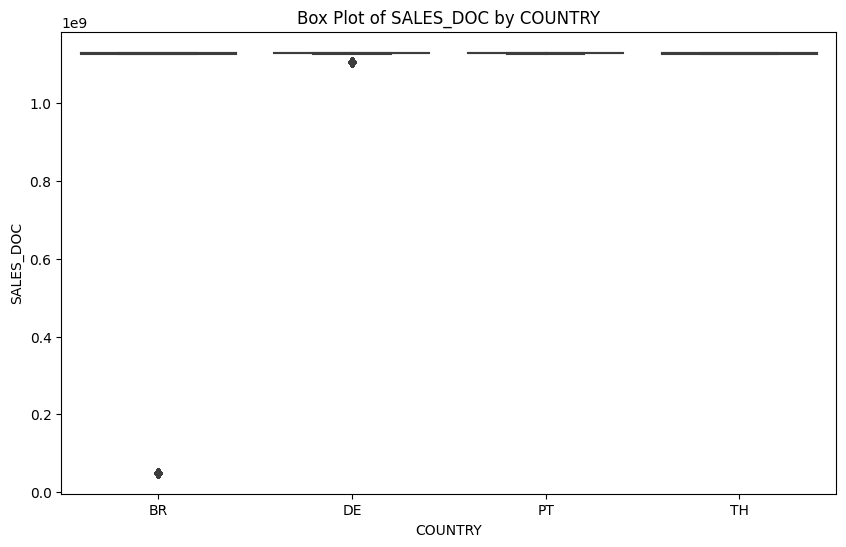

In [84]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='COUNTRY', y='SALES_DOC')
plt.title('Box Plot of SALES_DOC by COUNTRY')
plt.xlabel('COUNTRY')
plt.ylabel('SALES_DOC')
plt.show()

## Defining Classes

In [68]:
class PlotGraph:
    def __init__(self, graph_input) -> None:
        # constructor for the PlotGraph class
        self.graph_input = graph_input
        self.pos_ = nx.spring_layout(self.graph_input, iterations = 300, scale = -1)
        #self.pos_ = nx.kamada_kawai_layout(self.graph_input, dim=2)
        #self.pos_ =  nx.spiral_layout(self.graph_input)
        # dictionary mapping houses to colors
        self.color_dict = {'BR':'#b5446e', 'PT':'#2a9d8f', 'TH':'#e76f51', 'DE':'#e9c46a'}
        
    def make_edge(self, x, y, text, width):
        # helper function to create an edge trace for a single edge
        return  go.Scatter(x         = x,
                            y         = y,
                            line      = dict(width = width,
                                            color = 'cornflowerblue'),
                            hoverinfo = 'text',
                            text      = ([text]),
                            mode      = 'lines')
    
    def populate_edges(self):
            # function to create edge traces for all edges in the graph
            edge_trace = []
            for edge in self.graph_input.edges():
                # get the nodes connected by the edge
                char_1 = edge[0]
                char_2 = edge[1]
                # get the coordinates for the nodes
                x0, y0 = self.pos_[char_1]
                x1, y1 = self.pos_[char_2]
                # create a label for the edge
                text   = str(char_1) + '--' + str(char_2)
                # create the trace for the edge
                
                weight = self.graph_input.edges()[edge]['Weight']
                
                if  np.isnan(weight):
                    weight = 1
                    
                trace = self.make_edge([x0, x1, None], [y0, y1, None], text, width=np.log(weight+1))
                                                   
                # add the trace to the list of edge traces
                edge_trace.append(trace)
            return(edge_trace)

    def populate_nodes(self):
        # Get dictionary of nodes with their weighted degrees
        weighted_degrees = dict(nx.degree(self.graph_input))
        
        # Add 'size' attribute to each node in graph_input using weighted_degrees dictionary
        nx.set_node_attributes(self.graph_input, weighted_degrees, "size")

        # Initialize node trace
        node_trace = go.Scatter(x = [],
                                y = [],
                                text = [],
                                textposition = "top center",
                                textfont_size = 10,
                                mode = 'markers',
                                hoverinfo = 'text',
                                marker = dict(color = [],
                                            size  = [],
                                            line  = None))

        # Loop through all nodes and add them to the node trace
        for node in self.graph_input.nodes():
            # Add color of house to node's marker color
            #node_trace['marker']['color'] += tuple([self.color_dict[self.graph_input.nodes()[node]['house']]])
            # Get x, y coordinates of node
            x, y = self.pos_[node]
            # Add x, y coordinates to node trace
            node_trace['x'] += tuple([x])
            node_trace['y'] += tuple([y])
            # Add size of node to node's marker size (using logarithmic scale)
            node_trace['marker']['size'] += tuple([5*(np.log(self.graph_input.nodes()[node]['size']+1))])
            # Add node name to node's text
            node_trace['text'] += tuple(['<b>' + node + '</b>'])
                        
        return(node_trace)

    def populate_nodes(self):
        # Get dictionary of nodes with their weighted degrees
        weighted_degrees = dict(nx.degree(self.graph_input,weight='weight'))
        
        # Add 'size' attribute to each node in graph_input using weighted_degrees dictionary
        nx.set_node_attributes(self.graph_input, weighted_degrees, "size")

        # Initialize node trace
        node_trace = go.Scatter(x = [],
                                y = [],
                                text = [],
                                textposition = "top center",
                                textfont_size = 10,
                                mode = 'markers',
                                hoverinfo = 'text',
                                marker = dict(color = [],
                                            size  = [],
                                            line  = None))

        # Loop through all nodes and add them to the node trace
        
        for node in self.graph_input.nodes():
            # Add color of house to node's marker color
            #node_trace['marker']['color'] += tuple([self.color_dict[self.graph_input.nodes()[node]['house']]])
            # Get x, y coordinates of node
            x, y = self.pos_[node]
            # Add x, y coordinates to node trace
            node_trace['x'] += tuple([x])
            node_trace['y'] += tuple([y])
            node_trace['marker']['size'] += tuple([10])
            # Add node name to node's text
            node_trace['text'] += tuple(['<b>' + node + '</b>'])
                        
        return(node_trace)
    
    def create_arrows(self):
        annotations = []
        for edge in self.graph_input.edges():
            x0, y0 = self.pos_[edge[0]]
            x1, y1 = self.pos_[edge[1]]
            annotations.append(dict(ax=(x0 + x1) / 2, ay=(y0 + y1) / 2, axref='x', ayref='y',
                                    x=(x0 * 3 + x1) / 4, y=(y0 * 3 + y1) / 4, xref='x', yref='y',
                                    showarrow=True, arrowhead=4, arrowsize=1, arrowwidth=1, opacity=.6))
        return(annotations)


    def draw_graph(self):
        # Set layout of graph
        layout = go.Layout(
            plot_bgcolor='rgba(0,0,0,0)', # transparent 2nd background
            xaxis =  {'showgrid': False, 'zeroline': False}, # no gridlines
            yaxis = {'showgrid': False, 'zeroline': False}, # no gridlines
        )
        
        # Create figure
        fig = go.Figure(layout = layout)
        
        # Add all edge traces to figure
        for trace in self.populate_edges():
            fig.add_trace(trace)
        
        # Add node trace to figure
        fig.add_trace(self.populate_nodes())
        
        # Remove legend from figure
        fig.update_layout(showlegend = False)
        
        # Remove tick labels from x and y axes
        fig.update_xaxes(showticklabels = False)
        fig.update_yaxes(showticklabels = False)
        

        # Set size of figure
        fig.update_layout(
            autosize=False,
            width=800,
            height=800, annotations=self.create_arrows())
        
        # Return the figure
        return(fig)


class PM_Data:
    def __init__(self, df) -> None:
        self.PM_df = df  # initializes the object with a dataframe containingthe eventlog
        
    def header_level_df(self):
        header_level = df.drop_duplicates(['SALES_DOC', 'ACTIVITY'])
        header_level = header_level.drop(['SALES_DOC_ITEM', 'COUNTRY'], axis=1)
        header_level['TIMESTAMP'] =  pd.to_datetime(header_level['TIMESTAMP'], infer_datetime_format=True)
        header_level['Delta'] = header_level['TIMESTAMP'].shift(-1) - header_level['TIMESTAMP']
        header_level['Delta'] = header_level['Delta'].dt.seconds/60
        header_level = header_level.sort_values(['SALES_DOC', 'TIMESTAMP'], ascending=[1,1])
        header_level = header_level.query('TIMESTAMP != "NaT"')
        return(header_level)
    
    
    def from_df_to_edge_list(self):
        header_level = self.header_level_df()
        # sort the event log by SALES_DOC and TIMESTAMP
        header_level = header_level.sort_values(['SALES_DOC', 'TIMESTAMP'])

        # create a list of activities for each SALES_DOC
        activities_by_doc = header_level.groupby('SALES_DOC')['ACTIVITY'].apply(list).reset_index()

        # create a list of deltas for each SALES_DOC
        deltas_by_doc = header_level.groupby('SALES_DOC')['Delta'].apply(list).reset_index()

        # combine the activities and deltas into a single DataFrame
        doc_data = pd.merge(activities_by_doc, deltas_by_doc, on='SALES_DOC')
        edges = []

        # iterate over each SALES_DOC
        for doc in doc_data['SALES_DOC']:
            # get the list of activities for this SALES_DOC
            activities = doc_data.loc[doc_data['SALES_DOC'] == doc, 'ACTIVITY'].iloc[0]
            # get the list of deltas for this SALES_DOC
            deltas = doc_data.loc[doc_data['SALES_DOC'] == doc, 'Delta'].iloc[0]
            # iterate over each pair of adjacent activities
            for i in range(len(activities) - 1):
                # get the source and target activities
                source = activities[i]
                target = activities[i+1]
                # compute the average delta time between the two activities
                delta = sum(deltas[i:i+2])/2
                # add the edge to the list
                edges.append((source, target, delta))

        # create a DataFrame from the edges
        edge_list = pd.DataFrame(edges, columns=['Source', 'Target', 'Weight'])
        return(edge_list)
            

    def from_df_to_path(self):
        header_level = self.header_level_df()

        group = header_level.sort_values(['SALES_DOC','TIMESTAMP']).groupby('SALES_DOC')

        variants = list(group.apply(lambda x: x['ACTIVITY'].tolist()).values)

        return(variants)



    def multidigraph(self):
        G = nx.MultiDiGraph()
        
        variants = self.from_df_to_path()

        for path in variants:
            edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
            print(edges)
            G.add_edges_from(edges)

        return(G)
        


    def net(self):
        # calls the houses_edge_list method to get a filtered edge list dataframe
        edge_list = self.from_df_to_edge_list()
        # creates a new networkx graph object from the filtered edge list dataframe and stores it in a variable
        PM_Net = nx.from_pandas_edgelist(edge_list,'Source','Target', edge_attr='Weight')
        # sets the weight attribute of each edge in the graph to the corresponding weight from the edge list dataframe
        nx.set_edge_attributes(PM_Net,dict(zip(list(zip(edge_list.Source, edge_list.Target)), edge_list.Weight)) , "Weight")
        
        return(PM_Net)

In [69]:
pm = PM_Data(df)
g = PlotGraph(pm.net())
fig = g.draw_graph()
fig.show()


In [70]:
pm_net = pm.net()
print(pm_net.edges()[('Create Picking', 'Material Availability Date passed')]['Weight'])

1274.6583333333333


In [89]:
pm.from_df_to_path()

[['Material Availability Date passed',
  'Create Sales Order',
  'Create Sales Order Item'],
 ['Material Availability Date passed',
  'Create Sales Order Item',
  'Create Sales Order'],
 ['Material Availability Date passed',
  'Create Sales Order',
  'Create Sales Order Item'],
 ['Material Availability Date passed',
  'Create Sales Order Item',
  'Create Sales Order'],
 ['Material Availability Date passed',
  'Create Sales Order Item',
  'Create Sales Order'],
 ['Material Availability Date passed',
  'Create Sales Order',
  'Create Sales Order Item'],
 ['Material Availability Date passed',
  'Create Sales Order Item',
  'Create Sales Order'],
 ['Material Availability Date passed',
  'Create Sales Order',
  'Create Sales Order Item'],
 ['Material Availability Date passed',
  'Create Sales Order Item',
  'Create Sales Order'],
 ['Material Availability Date passed',
  'Create Sales Order',
  'Create Sales Order Item'],
 ['Material Availability Date passed',
  'Create Sales Order',
  'Crea

In [ ]:
group = header_level.sort_values(['SALES_DOC','TIMESTAMP']).groupby('SALES_DOC')

variants = list(group.apply(lambda x: x['ACTIVITY'].tolist()).values)

variants = variants[:50]

variants

NameError: name 'header_level' is not defined

In [ ]:
G = nx.MultiDiGraph()
for path in variants:
    edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
    print(edges)
    G.add_edges_from(edges)

NameError: name 'variants' is not defined

In [ ]:
g = PlotGraph(G)
fig = g.draw_graph()
fig.show()


## Finding Cycles


In [ ]:
cycle = nx.find_cycle(pm.net(), orientation = 'original')
cycle


[('Material Availability Date passed', 'Create Sales Order', 'forward'),
 ('Create Sales Order', 'Create Sales Order Item', 'forward'),
 ('Create Sales Order Item', 'Material Availability Date passed', 'forward')]

In [ ]:
simple_cycles = nx.algorithms.simple_cycles(pm.net())


NetworkXNotImplemented: not implemented for undirected type

In [ ]:
desired_nodes = ['Create Picking', 'Create Delivery']

# Filter cycles that pass through the desired nodes
filtered_cycles = [cycle for cycle in simple_cycles if set(desired_nodes).issubset(cycle)]

In [ ]:
cycle_basis = nx.cycle_basis(pm.net().to_undirected())

In [ ]:
cycle_basis


In [ ]:
# Count the number of cycles
cycle_count = sum(1 for _ in simple_cycles)

# Print the number of cycles
print("Number of simple cycles:", cycle_count)